# In this notebook, we're going to cover some of the most fundemantel concepts of tensor using Tensorflow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors and NumPy
* Using @tf.function (a way to speed up your regular Python function)
* Using GPUs with TensorFlow
* Exercises to try for yourself!

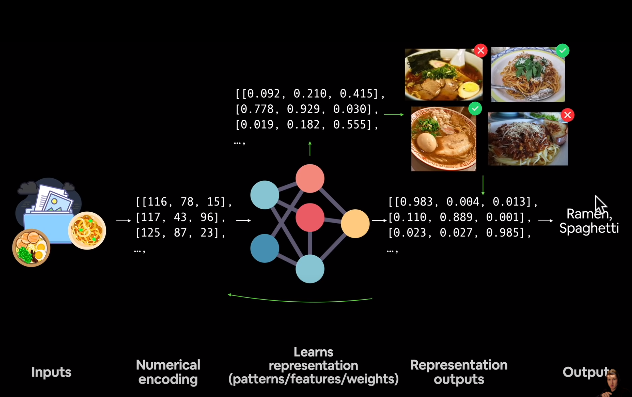

In [1]:
import tensorflow as tf

In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor (ndim tand for number of dimensions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [5]:
vector.ndim

1

In [6]:
# Create a matrix
matrix = tf.constant([[10,9],
                     [7,10]])

In [7]:
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  9],
       [ 7, 10]])>

In [8]:
matrix.ndim

2

In [9]:
# Create another matrix
another_matrix = tf.constant([[18. , 2.],
                             [3. , 2.4],
                             [8.,  9.]], dtype = tf.float16)

another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[18. ,  2. ],
       [ 3. ,  2.4],
       [ 8. ,  9. ]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# Let's create a tensor
tensor = tf.constant([[[1,2,3],
                      [4,5,6]],
                      [[7,8,9],
                      [10,11,12]],
                      [[13,14,15],
                      [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [12]:
tensor.ndim

3

What we've created so far:

* Scalar: a single number
* Vector: a number with direction
* Matrix: a 2-dim array of numbers
* Tensor: an n-dim array of numbers (when n can be any number)
    

### Creating tensorf with tf.Variable

In [13]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10 , 7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor , unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [14]:
# Let's try change one of the elements in our changeable tensor
changeable_tensor[0] = 7 #We can't use this way!

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
changeable_tensor[0].assign(7) #TRUE!

In [ ]:
# Let's try change our unchangeable tensor
unchangeable_tensor[0] = 2

In [ ]:
unchangeable_tensor[0].assign(5) #You can't use this method either!

### Note:
* Tf.Variable is changeable
* Tf.constant is not changeable

### Creating random tensors

Random tensors are tensors of some arbitrary size which contain random numbers

In [ ]:
# Create two random [but the same] tensors
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape = (3,2)) 
random_1

In [ ]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape = (3,2))
random_2

In [ ]:
random_3 = tf.random.Generator.from_seed(45)
random_3 = random_3.normal(shape = (3,2))
random_3

In [ ]:
# Shuffle the order of tensors
not_shuffled = tf.constant([[10,7],[2,4],[5,7]])
not_shuffled

In [ ]:
not_shuffled.ndim

In [ ]:
shuffled = tf.random.shuffle(not_shuffled, seed = 50 , name = "Woah") #Local Seed
shuffled == not_shuffled

### Other ways to make tensors

In [ ]:
import numpy as np

In [ ]:
np.ones(shape=[2,3],dtype=int)

In [ ]:
np.zeros(shape=[2,3],dtype=int)

### Turn NumPy arrays into Tensors

The main difference between NumPy arrays and Tensorflow tensors is that
tensors can be run on a GPU (much faster for numerical computing)

In [ ]:
numpy_A = np.arange(1 , 25 , dtype=np.int32) # Create a NumPy array between 1 and 25
numpy_A

A = tf.constant(numpy_A, shape=(2,3,4))
A

### Getting informations from tensors

* Shape: The length of each of the dimensions of a tensor
* Rank: The number of tensor dimensions
* Axis or dimension: A particular dimension of a tensor
* Size: The total number of items in the tensor

In [ ]:
def get_information(variable):
    
    print("Shape: ", variable.shape)
    print("Ndim: ", variable.ndim,)
    print("Total number of elements: ", tf.size(variable))

In [ ]:
random_3 = tf.random.Generator.from_seed(45)
random_3 = random_3.normal(shape = (3,2,2))
get_information(random_3)

### Indexing tensors

Tensors can be indexed just like Python lists.

In [ ]:
#### Get the first 2 elements of each dimension
random_3[:3,:2]

In [ ]:
random_3[:1,:1,:1]

In [ ]:
random_3[:,-1]

random_3.ndim

In [ ]:
## Add in extra dimension to our rank 3 tensor
rank4_tensor = random_3[...,tf.newaxis] #"..." every dimension
rank4_tensor

In [ ]:
rank4_tensor.ndim

### Manipulating tensors (tensor operations)

**Basic operations**
[+-*/]

In [ ]:
# You can add values to a tensor using the addition operator

In [ ]:
tensor = tf.constant([[10,8], [3,4]])

In [ ]:
tensor + 10

In [ ]:
tensor - 10

In [ ]:
#Note: Original tensor is unchanged!

In [ ]:
tensor * 20

In [ ]:
(tensor * 20) + 3

In [ ]:
(tensor * 20) / 2

In [ ]:
# We can use the tensorflow built-in function too
tf.multiply(tensor, 10)

https://www.tensorflow.org/api_docs/python/tf/math

**Matrix Multiplication**

In ML, matrix multiplication is one of the most common tensor operations.

In [ ]:
# Matrix multip. in tensorflow

tf.matmul(tensor, tensor)

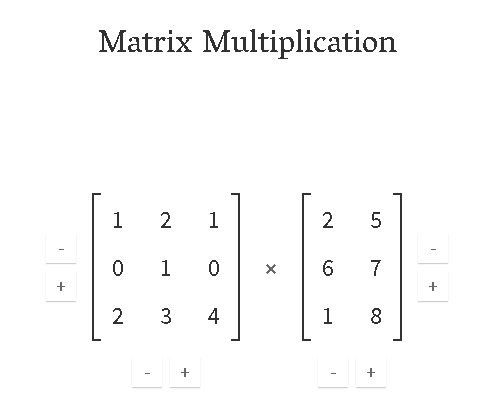

In [ ]:
first_matrix = tf.constant([[1,2,1],
            [0,1,0],
            [2,3,4]])

In [ ]:
second_matrix = tf.constant([[2,5],
            [6,7],
            [1,8]])

In [ ]:
first_matrix , second_matrix

In [ ]:
tf.matmul(first_matrix,second_matrix)

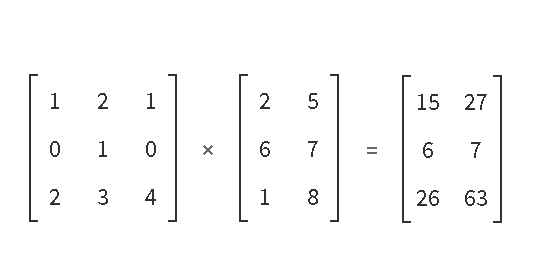


#### There are two rules our tensors (or matricex) need to fulfill if we're going to matrix multiply them:

* The inner dimensions must match 
* The resulting matrix has the shape of the outer dimensions

In [ ]:
matrix_1 = tf.constant([[1,2,5],
                       [7,2,1],
                       [3,3,3]])
matrix_1

In [ ]:
matrix_2 = tf.constant([[3,5],
                       [6,7],
                       [1,8]])
matrix_2

In [ ]:
tf.matmul(matirx_1,matrix_2)

# Changing the datatype of a tensor

In [ ]:
#Create a new tensor with default datatype (float32)
B = tf.constant([1.5,16.6])
B

In [ ]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype = tf.float16)
B

#tf.cast() --> Casts a tensor to a new type.

In [ ]:
# Change from int32 to float32
E = tf.cast(B, dtype=tf.float32)
E

### Aggregating Tensor

Aggregating tensors = Condensing them from multiple values down to a smaller an amount of values. (Condensing = Yoğunlaşma)

In [ ]:
# Get the absolute values
D = tf.constant([-7,-10])
D

In [ ]:
tf.abs(D)  # ---> (Mutlak Değer)

#### Let's go through the following forms of aggregation

* Min
* Max
* Mean
* Sum

In [ ]:
Aggregator = tf.constant([[10,6],
                         [2,6],])
Aggregator

In [ ]:
# Min
tf.reduce_min(Aggregator)

In [ ]:
# Max
tf.reduce_max(Aggregator)

In [ ]:
tf.reduce_mean(Aggregator)

In [ ]:
tf.reduce_sum(Aggregator)

In [ ]:
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32)) 

In [ ]:
tf.math.reduce_std(tf.cast(E, dtype=tf.float32)) 

### Find the positional maximum and minimum

In [ ]:
# Create a new tensor for finding positional minimum and maximum

In [ ]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

In [ ]:
# Find the positional maximum
tf.argmax(F)

In [ ]:
# Index on our largest value position
F[tf.argmax(F)]

In [ ]:
tf.reduce_max(F)

In [ ]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

In [ ]:
# Find the positional minimum
tf.argmin(F)

In [ ]:
F[tf.argmin(F)]

In [ ]:
tf.reduce_min(F)

In [ ]:
F[tf.argmin(F)] == tf.reduce_min(F)

### Squeezing a tensor (removing all single dimensions)




In [ ]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

In [ ]:
G.shape

In [ ]:
G_squuezed = tf.squeeze(G)
G_squuezed.shape

### One Hot Encoding Tensors

In [ ]:
# Create a list of indices
some_list = [0,1,2,3,4,5]

# One hot encode our list of indices
tf.one_hot(some_list, depth=6)

In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth= 6, on_value="yo I love deep learnig", off_value ="I also like to dance")

### Tensors and Numpy

TensorFlow interacts with NumPy arrays.

In [ ]:
# Create a tensor directly from a NumPy array
import numpy as np
J = tf.constant(np.array([3.,2.,1.]))
J

# MODULE START 1 (NEURAL NETWORK REGRESSION)

In [ ]:
# How much will this house sell for
# How many people will buy this app
# Objec Detection

What we're going to cover

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model
* Creating custom data to view and fit
* Steps in modelling
* Different evalution methods
* Savind and loading models

 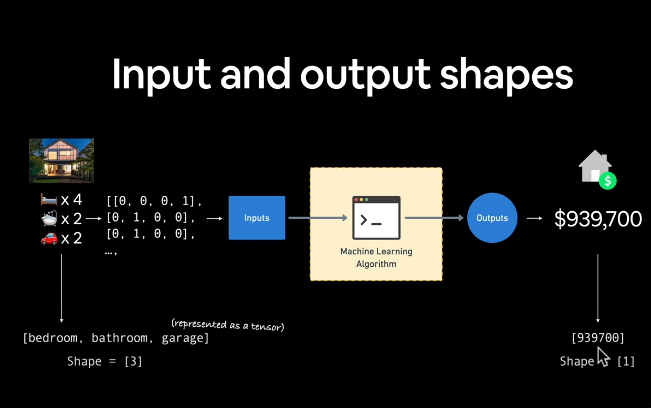

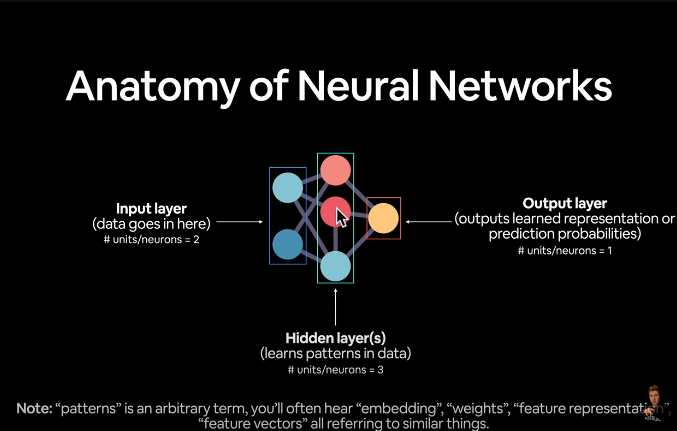


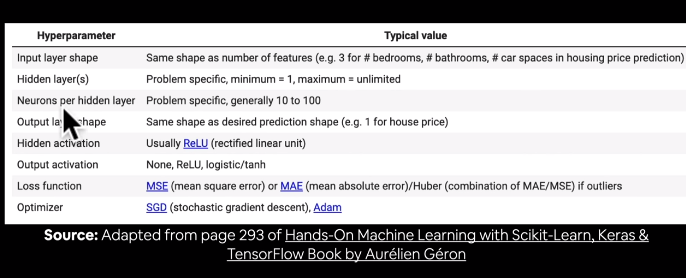